In [1]:
from swarms import SizeDistribution
from swarms import CollSwarm
from numpy import linspace, zeros, logspace, array
import matplotlib.pyplot as plt

# Jupiter: An Example

For the following plots, the specifications of Jupiter will be used to demonstrate the different possible plots that swarms.py can produce. 

In [2]:
Dmin = 12e-6; Dmax = 15e4; M_init = 7.37307e19

jupiter = SizeDistribution(Dmin, Dmax, M0=M_init)

In [3]:
initial_swarm_mass = jupiter.Mtot()
initial_swarm_area = jupiter.Atot()
print("Swarm mass = {0:.5e} kg".format(initial_swarm_mass))
print("Swarm area = {0:.5e} m^2".format(initial_swarm_area))

Swarm mass = 7.39324e+19 kg
Swarm area = 9.18122e+16 m^2


## Area Plot

One can plot the total surface area of a swarm over time by repeatedly updating the swarm for every needed time step and record the specific area at that time. There is the option to specify a dynamic maximum object size that would decrease over time as specified in Kennedy 2010.

In [4]:
M0 = 7.37307e19; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)
jupiter_no_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=False)

In [5]:
time = linspace(0, 1e10, 50000)
area_correct = zeros(50000)
area_no_correct = zeros(50000)

for i in range(len(time)):
    a = jupiter_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    b = jupiter_no_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    area_correct[i] = a
    area_no_correct[i] = b
    jupiter_correct.updateSwarm(time[i])
    jupiter_no_correct.updateSwarm(time[i])

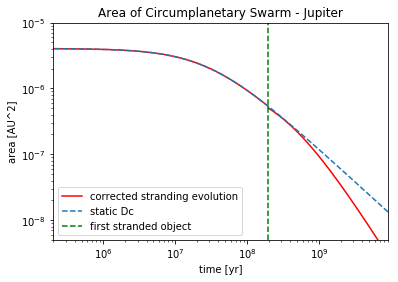

In [6]:
plt.loglog(time, area_correct, 'r', label="corrected stranding evolution")
plt.loglog(time, area_no_correct, ls='--', label="static Dc")
plt.axvline(jupiter_correct.tnleft, color='g', ls='--', label="first stranded object")
plt.xlabel("time [yr]")
plt.ylabel("area [AU^2]")
plt.title("Area of Circumplanetary Swarm - Jupiter")
plt.legend()
plt.xlim([2e5, 9e9])
plt.ylim([5e-9, 1e-5])
plt.show()

## Number Density Plot

Since it is possible to compute the number of objects in the swarm at any time with our code, an other possible plot that can be made is a size-distribution plot for logarithmic spaced times. 

In [7]:
jupiter_num = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

In [8]:
drange = linspace(0.1, 250000, 5000)
time_log = logspace(0, 10, 30)
num_distribution = []
Dc_list = []
for i in range(len(time_log)):
    #jupiter_num.tnleft = 0.5e8
    jupiter_num.updateSwarm(time_log[i])
    num = []
    dcc = []
    for j in range(len(drange)):
        dcc.append(jupiter_num.swarm.Dc)
        num.append(jupiter_num.computen(drange[j]))
    num_distribution.append(num)
    Dc_list.append(dcc)
    

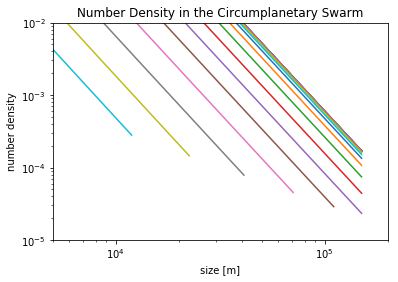

In [9]:
drange = array(drange)
for i in range(len(num_distribution)):
    num_dist = []
    prev_drange = []
    for j in range(len(num_distribution[i])):
        #print("drange = ", drange[j])
        #print("Dc = ", Dc_list[j])
        if drange[j] < Dc_list[i][j]:
            prev_drange.append(drange[j])
            num_dist.append(num_distribution[i][j])
    plt.loglog(prev_drange, num_dist)
#plt.loglog(Dc_list)
#print(Dc_list)
plt.xlim([5000, 200000])
plt.ylim([1e-5, 1e-2])
plt.xlabel("size [m]")
plt.ylabel("number density")
plt.title("Number Density in the Circumplanetary Swarm")
plt.show()

# Observable Quantities

## Flux Computations

We now demonstrate the important computations of thermal radiation flux as well as scattering flux produced by both the planet and the circumplanetary swarm. These values are critical, since they are the observable variables. The distance from the solar system, d_pl, used is 10 pc. We take a Jupiter mass planet orbiting an A5 main-sequence star.  

In [10]:
M0 = 10 * 7.34767309e22; Dt = 100.; Dmax = 250000.; L_s = 20 * 3.828e26;
M_s = 1.86 * 1.989e30; M_pl = 1.89587112e27; a_pl = 7.48e12
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = 3.086e17

jupiter5 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

jupiter5.updateSwarm(1e7) # Update the swarm to 4.5e9 years. 

waverange = logspace(-7, -3, 200)
Fth_planet = jupiter5.computeFth(waverange, planet=True)/1e-26
Fth_swarm = jupiter5.computeFth(waverange, swarm=True)/1e-26
Fs_planet = jupiter5.computeFs(waverange, 1., 0.52, planet=True)/1e-26
Fs_swarm = jupiter5.computeFs(waverange, 0.32, 0.08, swarm=True)/1e-26

C:\Users\loloynage\Documents\CE-Irregular-Satellites\swarms.py:268: RuntimeWarning: overflow encountered in exp
  b = 1/(exp(h*(c/lamb)/(k_B*T)) - 1)


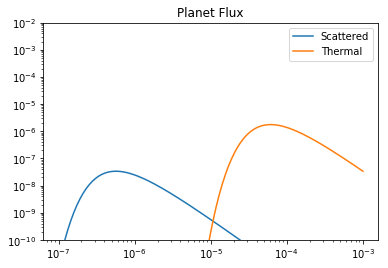

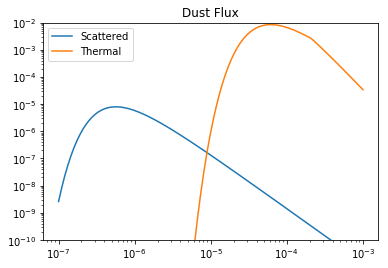

In [9]:
plt.figure(3)
plt.title('Planet Flux')
plt.loglog(waverange, Fs_planet, label="Scattered")
plt.loglog(waverange, Fth_planet, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

plt.figure(4)
plt.title('Dust Flux')
plt.loglog(waverange, Fs_swarm, label="Scattered")
plt.loglog(waverange, Fth_swarm, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

# Evolution of Debris Population

In [34]:
M0 = 0.01 * 7.3477e22; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter6 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True, alpha=1.2)

drange = linspace(0.01, 1.5e5, 2500)
#drange = logspace(2, 6, 1000)
time_log = logspace(6, 10, 10)
total_amount = []
# Testing
# num = []
#print(jupiter6.computeNtot(dlow=1000))
# for j in range(len(drange)):
#    num.append(jupiter6.computeNtot(dlow=drange[j]))
# total_amount.append(num)

for i in range(len(time_log)):
    jupiter6.updateSwarm2(time_log[i])
    num = []
    print(i)
    for d in drange:#j in range(len(drange)):
        Xc_val = jupiter6.computeXc()
        Mt = jupiter6.swarm.DMtot(jupiter6.Rcc0, time_log[i], jupiter6.tnleft, Xc_val, jupiter6.M_init, jupiter6.correction)
        jupiter6.swarm.M0 = Mt
        #jupiter6.swarm.compute_kg_from_Mtot(Mt)
        #jupiter6.swarm.compute_ks_from_kg()
        #jupiter6.updateSwarm2(time_log[i], d)
        #print(jupiter6.swarm.M0)
        num.append(jupiter6.computeNtot(dlow=d)) #Make dhigh explicit
    total_amount.append(num)

0
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  220346772177392.66
kg_val =  13902941423783.002
lower =  0
upper =  270082.77705710893
str upper =  0.0
qg =  1.7
k_str =  187.63551732929145
Dmax =  150000.0
Dc =  150000.0
dlow =  3301.3303081232493
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow 

Dmax =  150000.0
Dc =  150000.0
dlow =  76170.47310924369
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
2
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  82483868215162.1
kg_val =  5204380245149.298
lower =  0
upper =  149.71986970459054
str upper =  0.0
qg =  1.7
k_str =  70.23884729935224
Dmax =  150000.0
Dc =  150000.0
dlow =  66746.70422969187
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  82483868215162.1
kg_val =  5204380245149.298
lower =  0
upper =  11.195138355027732
str upper =  0.0
qg =  1.7
k_str =  70.23884729935224
Dmax =  150000.0
Dc =  150000.0
dlow =  130732.29420168065
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  82483868215162.1
kg_val =  5204380245149.298
lower =  0
upper =

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  36166197504619.06
kg_val =  2281932793746.067
lower =  0
upper =  91.18476470964954
str upper =  0.0
qg =  1.7
k_str =  30.79719803269607
Dmax =  150000.0
Dc =  150000.0
dlow =  58523.41546218487
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  36166197504619.06
kg_val =  2281932793746.067
lower =  0
upper =  4.684107540722907
str upper =  0.0
qg =  1.7
k_str =  30.79719803269607
Dmax =  150000.0
Dc =  150000.0
dlow =  131452.58226890757
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  14113596247787.357
kg_val =  890507720956.9545
lower =  0
upper =  41.47799147899743
str upper =  0.0
qg =  1.7
k_str =  12.018383147443405
Dmax =  150000.0
Dc =  150000.0
dlow =  54921.97512605042
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc


	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  5233682159059.567
kg_val =  330223019693.35944
lower =  0
upper =  25.6046934087583
str upper =  0.0
qg =  1.7
k_str =  4.456723598663087
Dmax =  150000.0
Dc =  150000.0
dlow =  44117.65411764706
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  5233682159059.567
kg_val =  330223019693

upper =  1.462320356657805
str upper =  0.0
qg =  1.7
k_str =  4.456723598663087
Dmax =  150000.0
Dc =  150000.0
dlow =  116866.74890756301
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  5233682159059.567
kg_val =  330223019693.35944
lower =  0
upper =  1.4012394871307596
str upper =  0.0
qg =  1.7
k_str =  4.456723598663087
Dmax =  150000.0
Dc =  150000.0
dlow =  117827.13299719886
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  5233682159059.567
kg_val =  330223019693.35944
lower =  0
upper =  1.3712737434227122
str upper =  0.0
qg =  1.7
k_str =  4.456723598663087
Dmax =  150000.0
Dc =  150000.0
dlow =  118307.32504201679
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < D

Dmax =  150000.0
Dc =  89330.51969102371
dlow =  42016.813921568624
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow <

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  5869192849668.879
kg_val =  370321033466.922
lower =  0
upper =  0
str upper =  5.399462473488877
qg =  1.7
k_str =  14.84152994288171
Dmax =  150000.0
Dc =  89330.51969102371
dlow =  116566.6288795518
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  5869192849668.879
kg_val =  370321033466.922
lower =  0
upper =  0
str upper =  5.190993393165645
qg =  1.7
k_str =  14.84152994288171
Dmax =  150000.0
Dc =  89330.51969102371
dlow =  117707.08498599438
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc

lower =  0
upper =  0
str upper =  88.15411821427658
qg =  1.7
k_str =  44.39585002609913
Dmax =  150000.0
Dc =  36922.17086172692
dlow =  37875.157535014005
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 

Dc =  36922.17086172692
dlow =  112725.09252100838
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  2745652394943.1094
kg_val =  173238954397.899
lower =  0
upper =  0
str upper =  16.415946178801686
qg =  1.7
k_str =  44.39585002609913
Dmax =  150000.0
Dc =  36922.17086172692
dlow =  116086.43683473388
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 

upper =  0
str upper =  160.94184795298165
qg =  1.7
k_str =  78.92372793666539
Dmax =  150000.0
Dc =  12597.552873247107
dlow =  36494.60540616247
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc


	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  510280050020.1124
kg_val =  32196494530.191082
lower =  0
upper = 

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  57989406096.55611
kg_val =  3658884167.866

	 dlow > Dc
	 dlow > Dc
ks_val =  57989406096.55611
kg_val =  3658884167.866663
lower =  0
upper =  0
str upper =  44.73304056352786
qg =  1.7
k_str =  104.23536570099684
Dmax =  150000.0
Dc =  3917.5629528084123
dlow =  111404.56439775908
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  57989406096.55611
kg_val =  3658884167.866663
lower =  0
upper =  0
str upper =  40.420205980175716
qg

In [36]:
print(time_log)

[1.00000000e+06 2.78255940e+06 7.74263683e+06 2.15443469e+07
 5.99484250e+07 1.66810054e+08 4.64158883e+08 1.29154967e+09
 3.59381366e+09 1.00000000e+10]


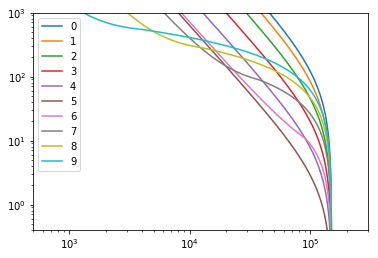

In [35]:
for i in range(len(total_amount)):
    plt.loglog(drange, total_amount[i], label=i)

plt.legend()
plt.ylim([4e-1, 1e3])
plt.xlim([5e2, 3e5])
plt.show()